# Regularization Techniques in PyTorch

Data used for this notebook is from a Kaggle competition  
Link to the competition: https://www.kaggle.com/c/santander-customer-transaction-prediction  
Type of Problem: Classification  

## Import libraries

In [1]:
import torch
from torch import nn

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

## Get training data

In [2]:
df_train = pd.read_csv('data/train.csv')

print(df_train.shape)
df_train.head(2)

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [3]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## Pre-processing data

In [4]:
var_columns = [c for c in df_train.columns if c not in ('ID_code','target')]
len(var_columns)

200

In [5]:
scaler = MinMaxScaler()

df_train[var_columns] = scaler.fit_transform(df_train[var_columns])
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,0.515985,0.527761,0.498848,0.516818,0.517698,0.551997,0.501877,0.501123,0.522330,...,0.532601,0.521950,0.470032,0.502746,0.483477,0.536917,0.507605,0.488022,0.483899,0.527460
std,0.300653,0.152716,0.159324,0.153221,0.154463,0.139968,0.157852,0.142057,0.152988,0.161333,...,0.140158,0.155773,0.121015,0.132779,0.162998,0.149925,0.167666,0.152592,0.152223,0.154974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.404160,0.405322,0.383234,0.400217,0.414637,0.428839,0.396761,0.384659,0.396368,...,0.431376,0.404422,0.385063,0.411373,0.360573,0.429027,0.376952,0.379516,0.380712,0.410436
50%,0.000000,0.508191,0.528530,0.491004,0.518970,0.520277,0.556658,0.497967,0.497138,0.527633,...,0.531653,0.517279,0.467860,0.504894,0.481614,0.533706,0.510850,0.484718,0.487100,0.534987
75%,0.000000,0.620387,0.645236,0.603369,0.632294,0.619692,0.672246,0.599256,0.615573,0.650798,...,0.630091,0.628818,0.553659,0.598340,0.608396,0.638836,0.638353,0.601460,0.594820,0.648661
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split training data into dependent and independent variables

In [6]:
X_np = df_train.loc[:, var_columns].to_numpy()
y_np = df_train.loc[:, 'target'].to_numpy()

In [7]:
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).reshape(-1,1)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

(torch.Size([160000, 200]),
 torch.Size([40000, 200]),
 torch.Size([160000, 1]),
 torch.Size([40000, 1]))

## Model without regularization

In [9]:
model = nn.Sequential(
    nn.Linear(200, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [10]:
def train_model(model, optimizer=None):
    loss_fn = nn.BCELoss()
    if optimizer == None:
        optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

    batch_size = 1000
    n_epochs = 15

    for epoch in range(n_epochs):
        for b in range(0, X_train.shape[0], batch_size):

            # Get data in batches
            X_train_batch = X_train[b:b+batch_size]
            y_train_batch = y_train[b:b+batch_size]

            # Make predictions
            y_train_batch_pred = model(X_train_batch)
            y_val_pred = model(X_val)

            # Calculate loss
            loss_train = loss_fn(y_train_batch_pred, y_train_batch)
            loss_val = loss_fn(y_val_pred, y_val)

            # Backpropagation
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

        print(f'Epoch {epoch}, training loss {loss_train}, validation loss {loss_val}')
    return model

model = train_model(model)

Epoch 0, training loss 0.1950383484363556, validation loss 0.2592666745185852
Epoch 1, training loss 0.18203945457935333, validation loss 0.2396542727947235
Epoch 2, training loss 0.18093866109848022, validation loss 0.24150051176548004
Epoch 3, training loss 0.1806374490261078, validation loss 0.2410697191953659
Epoch 4, training loss 0.18064668774604797, validation loss 0.2409086972475052
Epoch 5, training loss 0.18098333477973938, validation loss 0.24169237911701202
Epoch 6, training loss 0.18101222813129425, validation loss 0.2415483146905899
Epoch 7, training loss 0.18099980056285858, validation loss 0.24146942794322968
Epoch 8, training loss 0.18089032173156738, validation loss 0.24104319512844086
Epoch 9, training loss 0.18077003955841064, validation loss 0.24064218997955322
Epoch 10, training loss 0.18065688014030457, validation loss 0.2402980774641037
Epoch 11, training loss 0.18064473569393158, validation loss 0.2401433289051056
Epoch 12, training loss 0.18064208328723907, va

In [11]:
y_val_pred = model(X_val)
fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
roc_auc = auc(fpr, tpr)

print(f"\nROC AUC: {roc_auc}")


ROC AUC: 0.8591430224650477


## 1. Batch normalization

Batch Normalization (BatchNorm) is a technique to improve training stability and speed up convergence. It involves normalizing the inputs to a layer in a neural network by scaling the activations. The normalization is performed across a mini-batch of data during training.

Pytorch Normalization Layers: https://pytorch.org/docs/stable/nn.html#normalization-layers

Pytorch BatchNorm1d: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d

In [12]:
model = nn.Sequential(
    nn.Linear(200, 20),
    nn.BatchNorm1d(20),
    nn.ReLU(),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

model = train_model(model)

y_val_pred = model(X_val)
fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
roc_auc = auc(fpr, tpr)

print(f"\nROC AUC: {roc_auc}")

Epoch 0, training loss 0.1896267831325531, validation loss 0.23936718702316284
Epoch 1, training loss 0.18861207365989685, validation loss 0.23827646672725677
Epoch 2, training loss 0.1876419186592102, validation loss 0.2385040521621704
Epoch 3, training loss 0.18663083016872406, validation loss 0.23792226612567902
Epoch 4, training loss 0.18602992594242096, validation loss 0.23736120760440826
Epoch 5, training loss 0.18646952509880066, validation loss 0.23698459565639496
Epoch 6, training loss 0.1877904087305069, validation loss 0.23716314136981964
Epoch 7, training loss 0.18903066217899323, validation loss 0.23760558664798737
Epoch 8, training loss 0.18875746428966522, validation loss 0.23760925233364105
Epoch 9, training loss 0.1879933774471283, validation loss 0.2374989241361618
Epoch 10, training loss 0.18813951313495636, validation loss 0.23723822832107544
Epoch 11, training loss 0.18810375034809113, validation loss 0.2367611825466156
Epoch 12, training loss 0.18911880254745483, 

## 2. Dropout layers

Dropout involves randomly dropping out (setting to zero) a fraction of the neurons during training

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html

In [13]:
model = nn.Sequential(
    nn.Linear(200, 20),
    nn.ReLU(),
    nn.Dropout(p=0.1),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

model = train_model(model)

y_val_pred = model(X_val)
fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
roc_auc = auc(fpr, tpr)

print(f"\nROC AUC: {roc_auc}")

Epoch 0, training loss 0.2239675223827362, validation loss 0.2874481976032257
Epoch 1, training loss 0.21696166694164276, validation loss 0.27811747789382935
Epoch 2, training loss 0.21434463560581207, validation loss 0.27311259508132935
Epoch 3, training loss 0.21393537521362305, validation loss 0.2715746760368347
Epoch 4, training loss 0.21592222154140472, validation loss 0.2708582282066345
Epoch 5, training loss 0.20834137499332428, validation loss 0.2718031108379364
Epoch 6, training loss 0.21444527804851532, validation loss 0.27060753107070923
Epoch 7, training loss 0.21975202858448029, validation loss 0.2705998420715332
Epoch 8, training loss 0.21027326583862305, validation loss 0.2718959450721741
Epoch 9, training loss 0.2127610296010971, validation loss 0.2695762813091278
Epoch 10, training loss 0.21774853765964508, validation loss 0.27154460549354553
Epoch 11, training loss 0.21746566891670227, validation loss 0.27292364835739136
Epoch 12, training loss 0.21212519705295563, va

## 3. L2 regularisation (weight_decay)

In [14]:
model = nn.Sequential(
    nn.Linear(200, 20),
    nn.ReLU(),
    nn.Linear(20, 1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.1, weight_decay=0.01)

model = train_model(model, optimizer)

y_val_pred = model(X_val)
fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
roc_auc = auc(fpr, tpr)

print(f"\nROC AUC: {roc_auc}")

Epoch 0, training loss 0.2572122812271118, validation loss 0.3301537036895752
Epoch 1, training loss 0.26014193892478943, validation loss 0.3323715031147003
Epoch 2, training loss 0.2599358558654785, validation loss 0.32622405886650085
Epoch 3, training loss 0.2599320411682129, validation loss 0.3203252851963043
Epoch 4, training loss 0.2578936815261841, validation loss 0.320853590965271
Epoch 5, training loss 0.25721046328544617, validation loss 0.33025848865509033
Epoch 6, training loss 0.25644347071647644, validation loss 0.3264911472797394
Epoch 7, training loss 0.2569253444671631, validation loss 0.3278360366821289
Epoch 8, training loss 0.2570936679840088, validation loss 0.32839229702949524
Epoch 9, training loss 0.2569923996925354, validation loss 0.32744649052619934
Epoch 10, training loss 0.2576242983341217, validation loss 0.329968124628067
Epoch 11, training loss 0.26264679431915283, validation loss 0.3312886357307434
Epoch 12, training loss 0.2647956311702728, validation l

## 4. Early Stopping

Early stopping involves monitoring the performance of the model on a validation set during training and stopping the training process once the performance stops improving or begins to degrade

In [15]:
model = nn.Sequential(
    nn.Linear(200, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [16]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

batch_size = 1000
n_epochs = 15

best_val_loss = float('inf')
for epoch in range(n_epochs):
    for b in range(0, X_train.shape[0], batch_size):

        # Get data in batches
        X_train_batch = X_train[b:b+batch_size]
        y_train_batch = y_train[b:b+batch_size]

        # Make predictions
        y_train_batch_pred = model(X_train_batch)
        y_val_pred = model(X_val)

        # Calculate loss
        loss_train = loss_fn(y_train_batch_pred, y_train_batch)
        loss_val = loss_fn(y_val_pred, y_val)

        # Backpropagation
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    
    print(f'Epoch {epoch}, training loss {loss_train}, validation loss {loss_val}')
    if loss_val < best_val_loss:
        best_val_loss = loss_val
        # Save the model snapshot if needed
        torch.save(model.state_dict(), "best_model.pth")
    else:
        print("\nEarly stopping triggered...")
        model.load_state_dict(torch.load("best_model.pth"))
        break

Epoch 0, training loss 0.20545975863933563, validation loss 0.2603316009044647
Epoch 1, training loss 0.18188320100307465, validation loss 0.24081175029277802
Epoch 2, training loss 0.18121041357517242, validation loss 0.24230197072029114

Early stopping triggered...


In [17]:
y_val_pred = model(X_val)
fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
roc_auc = auc(fpr, tpr)

print(f"\nROC AUC: {roc_auc}")


ROC AUC: 0.8586643712820141


## 5. Data Augmentation

- Data augmentation is a regularization technique to artificially increase the size of the training dataset by applying various transformations to the existing data
- The goal is to expose the model to a wider range of variations in the input data, helping it become more robust and generalize better to unseen examples
- Data augmentation acts as a form of regularization by introducing variability, preventing the model from memorizing the training set and promoting more robust feature learning
- Most commonly used for computer vision applications

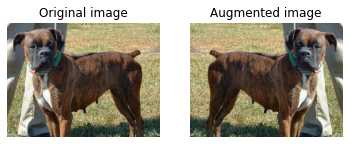  
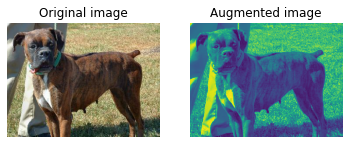  
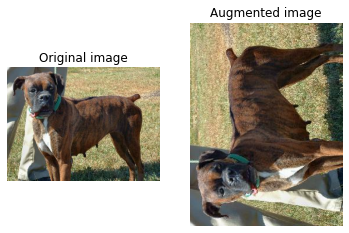  
Source: https://www.datacamp.com/tutorial/complete-guide-data-augmentation